# Numpy教学

##  Numpy重要的原因之一
除了Numpy可以进行包含大量数组的运算<br><br>
Numpy数组使用的内存量也小于其他Python内建库<br><br>
对一个10^8维的数组做10次乘2运算，使用np和python自带list的运算时间对比。

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(10**8)
my_list = list(range(10**8))

In [33]:
%time for _ in range(10):my_arr2 = my_arr * 2

Wall time: 2.46 s


In [34]:
%time for _ in range(10):my_list2 = my_list * 2

Wall time: 24.8 s


## Numpy多维数组对象

### np.array直接创建

In [94]:
arr = np.array([[0,1,2],[3,4,5]])

In [95]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [36]:
data = np.random.randn(2,3)

In [37]:
data

array([[ 0.61734716,  1.25473408, -0.02759347],
       [-0.31621847, -0.73649728,  0.53748323]])

In [38]:
data * 10 

array([[  6.17347157,  12.54734082,  -0.27593472],
       [ -3.16218471,  -7.36497285,   5.37483232]])

In [39]:
data + 1

array([[ 1.61734716,  2.25473408,  0.97240653],
       [ 0.68378153,  0.26350272,  1.53748323]])

In [40]:
(data.shape, data.dtype)

((2, 3), dtype('float64'))

In [44]:
data1 = (1,2,3,4)
data2 = [[1,2,3,4],(2,3,4,5)]
arr1 = np.array(data1)
arr2 = np.array(data2)

In [45]:
arr1

array([1, 2, 3, 4])

In [46]:
arr2

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

In [96]:
(arr2.ndim, arr2.shape)

(2, (2, 3))

### 其他创建数组方式

**生成全零数组**

In [49]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [51]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

<font color = blue>用`np.empty()`生成全0数组并不安全，会返回未初始化的垃圾数组。</font>

In [53]:
np.empty((2,2,3))

array([[[  9.19569187e-312,   3.16202013e-322,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   1.23162632e+165]],

       [[  6.76293508e+170,   9.77054696e+165,   1.36312809e+161],
        [  4.47069207e-062,   4.16148120e-061,   3.22003216e-057]]])

**生成顺序数组**

In [67]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [153]:
np.arange(15).reshape(3,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**生成单位矩阵形式的数组**

In [60]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [61]:
np.ones((1,2))

array([[ 1.,  1.]])

通过`dtype`<font color = blue>指定ndarray的数据类型</font>

In [64]:
arr1 = np.array([1,2,3], dtype = np.float64)

In [65]:
arr1

array([ 1.,  2.,  3.])

In [68]:
arr = np.array([1,2,3,4,5])

In [69]:
arr.dtype

dtype('int32')

**转换数组类型**

In [70]:
float_arr = arr.astype(np.float64)

In [73]:
float_arr.dtype

dtype('float64')

### 向量化数组运算

PS：向量化即用表达式代替循环

In [82]:
arr1 = np.array([[1,2,3],[4,5,6]]).astype(np.float64)

In [84]:
arr1*arr1

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [85]:
arr1-arr1

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [86]:
1/arr1

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [89]:
arr2 = np.array([[0,4,1],[7,2,12]]).astype(np.float64)

In [90]:
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [92]:
arr2 > arr1

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

### 基础切片和索引

**一维数组的索引和切片**

In [97]:
arr = np.arange(10)

In [98]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
arr[5]

5

In [100]:
arr[5:8]

array([5, 6, 7])

<font color = blue>给整个切片传递数值</font><br><br>
<font color = red>区别于python，对切片的处理直接反映到原数组上，这是为了适应处理大数据，减少复制数据的内存问题</font><br><br>
<font color = red>想要复制数组，必须使用`.copy`</font>

In [101]:
arr[5:8] = 12

In [102]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [104]:
copy = arr[5:8].copy()
copy[:] = 10

In [105]:
copy

array([10, 10, 10])

In [106]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**二维数组的索引和切片**

In [107]:
arr2d = np.array([[1,2,3],[4,5,6]])

In [108]:
arr2d

array([[1, 2, 3],
       [4, 5, 6]])

In [109]:
arr2d[0]

array([1, 2, 3])

In [110]:
arr2d[0][0]

1

<font color = blue>`arr2d[0][0]`的另一种写法</font>

In [111]:
arr2d[0,0]

1

In [114]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [115]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

按行切片

In [116]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

按列切片

In [128]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

<font color = blue>写成下式输出将有所不同</font>

In [126]:
arr2d[:,0]

array([1, 4, 7])

多组切片

In [129]:
arr2d[0:2,0:2]

array([[1, 2],
       [4, 5]])

**布尔索引**

In [131]:
names = np.array(['xm','xh','xb'])
data = np.random.randn(3,4)

In [133]:
names

array(['xm', 'xh', 'xb'],
      dtype='<U2')

In [134]:
data

array([[ 0.38340174,  1.35015863,  0.48625377, -0.61533529],
       [ 0.10783922,  1.10582856,  0.34018074,  0.01722797],
       [-0.69145763, -0.29418283, -1.03912595,  0.60349992]])

In [139]:
names == 'xm'

array([ True, False, False], dtype=bool)

In [136]:
data[names == 'xm',:2]

array([[ 0.38340174,  1.35015863]])

In [144]:
data[(names == 'xm') | (names == 'xh')]

array([[ 0.38340174,  1.35015863,  0.48625377, -0.61533529],
       [ 0.10783922,  1.10582856,  0.34018074,  0.01722797]])

In [145]:
data[names == 'xm'] = 0

In [146]:
data

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.10783922,  1.10582856,  0.34018074,  0.01722797],
       [-0.69145763, -0.29418283, -1.03912595,  0.60349992]])

**神奇索引**  

用整数数组作为索引

In [148]:
arr = np.empty((8,4))

In [149]:
for i in range(8):
    arr[i] = i

In [150]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

索引arr的第0,2行和倒数第一行

In [152]:
arr[[0,2,-1]]

array([[ 0.,  0.,  0.,  0.],
       [ 2.,  2.,  2.,  2.],
       [ 7.,  7.,  7.,  7.]])

索引arr的第0行第0列、第1行第1列、第2行第2列的元素(同时索引行列）

In [155]:
arr[[0,1,2],[0,1,2]]

array([ 0.,  1.,  2.])

索引arr的第0行第0列、第1行第1列、第2行第2列的元素并形成矩阵区域（先索引行再索引列）

In [156]:
arr[[0,1,2]][:,[0,1,2]]

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  2.,  2.]])

### 数组转置和内积

**转置**

In [158]:
arr =  np.arange(1,16).reshape(3,5)

In [159]:
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [160]:
arr.T

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

**内积**

In [161]:
np.dot(arr.T,arr)

array([[158, 176, 194, 212, 230],
       [176, 197, 218, 239, 260],
       [194, 218, 242, 266, 290],
       [212, 239, 266, 293, 320],
       [230, 260, 290, 320, 350]])

## Numpy通用函数（`ufun`，逐元素操作）

### 一元通用函数

函数名|描述
:-:|:-:
abs|计算每个元素的绝对值  
aqrt|计算每个元素的平方根
square|计算每个元素的平方
exp|计算每个元素的e的^x
log、log10、log2、log1p|计算e、10、2、log(1 + x)对数
sign|计算每个元素的符号（1、0、-1）
ceil|每个元素向上取整
floor|每个元素向下取整
rint|将元素保留到整数位并保持dtype
modf|分别将小数部分和整数部分按数组形式返回
isnan|判断元素是否NaN
isfinite、isinf|判断元素是否有限、无限
cos、cosh、sin、…|三角函数
logical_not|对数组的元素按位取反

In [168]:
arr = np.arange(10)

In [169]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [170]:
arr = np.random.randn(1,3)

In [171]:
arr

array([[-0.23224206, -0.86763741,  1.18389862]])

In [172]:
remainder,whole_part = np.modf(arr)

In [173]:
remainder,whole_part

(array([[-0.23224206, -0.86763741,  0.18389862]]), array([[-0., -0.,  1.]]))

### 二元通用函数

函数名|描述
:-:|:-:
add|将数组对应元素相加
subtract|在第二个数组中除去第一个数组包含的元素
multiply|对应元素相乘
divide，floor_divide|除，整除
power|将第二个数组元素作为第一个数组元素的幂次方
maximum,fmax|比较对应位置元素求最大值，fmax忽略NaN
minimum,fmin|比较对应位置元素求最小值，fmax忽略NaN
mod|求余数（模运算）
copysign|将第一个数组的符号值改为第二个数组的符号值
greater,great_equal,less,less_equal,equal,not_equal|比较对应元素>、>=、<、<=、=、!=
logical_and,logical_or,logical_xor|逻辑与（&）、或（or）、异或（^)

## 使用数组进行面向数组编程（向量化）

### 例：利用`meshgrid`实现两个一维数组所有元素互相相乘

In [179]:
points = np.arange(-5,5,0.01)

In [180]:
xs,ys = np.meshgrid(points,points)

In [181]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [189]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [190]:
z = np.sqrt(xs**2 + ys**2)

In [191]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [53]:
import matplotlib.pyplot as plt

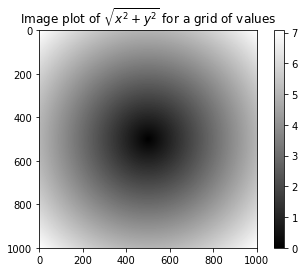

In [197]:
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

### 例：用`where`根据一个数组来生成一个新数组
<font color = red>数据分析典型用法<fond>：假设有一个随机生成的数组，想要将所有正值替换为2，负值替换为-2

In [198]:
arr = np.random.randn(4,4)

In [199]:
arr

array([[ 0.51682366, -1.49516857, -2.52406015,  0.98193756],
       [-1.45940473,  0.91024767,  0.94932837,  1.03384917],
       [-2.47743383, -0.29598358,  0.60205452, -0.63459714],
       [ 0.59254057, -0.58540392, -0.83115227,  0.94402475]])

In [200]:
arr > 0

array([[ True, False, False,  True],
       [False,  True,  True,  True],
       [False, False,  True, False],
       [ True, False, False,  True]], dtype=bool)

**`np.where(condition, x ,y)`等价于三元表达式`x if condition else y`**

In [201]:
np.where(arr > 0,2,-2)

array([[ 2, -2, -2,  2],
       [-2,  2,  2,  2],
       [-2, -2,  2, -2],
       [ 2, -2, -2,  2]])

## Numpy线性代数运算

### 矩阵的相乘/各元素相乘

In [3]:
x = np.array([[1,2,3]])

In [4]:
y = np.array([[4,5,6]])

**矩阵的点乘（各元素相乘）**

In [5]:
x*y

array([[ 4, 10, 18]])

**矩阵乘法**

In [21]:
z = x.T.dot(y)
# z = np.dot(x.T, y)
z

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [22]:
z1 = x.T @ y
z1

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

## 矩阵分解函数集合 np.linalg
函数|描述
:-:|:-:
diag|将一个方阵的对角线元素作为一维数组返回，或将一维数组生成其他元素为0的对角阵
trace|计算对角线元素和
det|计算行列式值
eig|计算特征值和特征向量
inv|求逆
pinv|加号逆（伪逆）
qr|QR分解
svd|奇异值分解
solve|求解Ax = b，其中A为方阵
lstsq|求Ax = b的最小二乘解

In [23]:
x = np.random.rand(5,5)

In [24]:
x

array([[ 0.92159681,  0.17016912,  0.86910117,  0.18931388,  0.75341518],
       [ 0.78375023,  0.1822416 ,  0.3129539 ,  0.66230742,  0.87579286],
       [ 0.3341608 ,  0.90389965,  0.2502772 ,  0.8744084 ,  0.90514059],
       [ 0.93638513,  0.72332326,  0.88805093,  0.25292799,  0.1342868 ],
       [ 0.04157659,  0.05655035,  0.89266425,  0.55763104,  0.32751119]])

**例：求逆**

In [29]:
x_ni = np.linalg.inv(x)

In [30]:
x_ni

array([[-0.49607461,  1.28220774, -0.75218291,  0.77477418, -0.52642142],
       [ 0.25333053, -1.14931689,  1.02674132,  0.36835093, -0.49802711],
       [ 0.62489395, -0.80003392, -0.02917677,  0.03083055,  0.76983128],
       [-1.95679802,  1.79294925, -0.49892275,  0.56533015,  0.85404117],
       [ 1.6477299 , -0.83648446,  0.8472092 , -1.20853827, -0.3462181 ]])

In [31]:
x @ x_ni

array([[  1.00000000e+00,   4.03242789e-16,  -2.93583573e-16,
          1.96023491e-16,   1.77047840e-16],
       [  2.51254729e-16,   1.00000000e+00,   1.45279874e-16,
         -2.08992831e-16,   1.16356636e-16],
       [  1.30708118e-16,  -1.30270625e-16,   1.00000000e+00,
         -1.79462698e-16,   6.45786346e-17],
       [  2.70700183e-17,   1.17376037e-16,   4.73695195e-17,
          1.00000000e+00,   4.55513718e-17],
       [ -1.47172492e-16,   1.06755772e-16,  -2.51608362e-17,
          2.37788620e-17,   1.00000000e+00]])

**例：QR分解**

In [32]:
q, r = np.linalg.qr(x)
q

array([[-0.58832882, -0.36249112,  0.1639093 , -0.14269456, -0.68937754],
       [-0.50033034, -0.26454551, -0.32324054,  0.6728468 ,  0.34996853],
       [-0.21332151,  0.84993973, -0.10910463,  0.30749608, -0.35445555],
       [-0.59776938,  0.27307552,  0.10734494, -0.54856034,  0.50562847],
       [-0.02654166,  0.04059664,  0.91935985,  0.36255091,  0.14485079]])

## 伪随机数生成 np.random

In [38]:
x = np.random.normal(size = (4, 4))

In [39]:
x

array([[ 0.96164408,  0.46709156,  1.30439433,  0.86774579],
       [-0.4582026 , -0.38135697,  1.51848716,  0.01780385],
       [-0.33020813,  1.77705548,  1.00891254,  0.8135981 ],
       [-1.18790574, -0.84306   , -0.17783747, -1.73000371]])

In [43]:
y = np.random.randn(4,4)

In [41]:
y

array([[-0.32900942, -0.38547298,  1.30835776, -0.70759562],
       [-0.65182662, -0.2851161 ,  0.48412417,  0.34246075],
       [-0.379044  , -0.02178904, -0.35079755, -1.06450424],
       [-0.67826221,  0.95135223,  1.38614064, -1.11483475]])

**例：随机漫步**

In [48]:
print(np.random.randint(0,1))

0


In [49]:
print(np.random.randint(0,1))

0


In [50]:
print(np.random.randint(0,1))

0


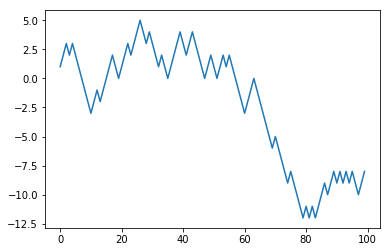

In [67]:
draws = np.random.randint(0,2,size=1000)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk[:100])